In [2]:
# Download the Repository 
# !git clone "https://github.com/prithsha/erav2-session-11-plus.git"


In [3]:
# Change to working directory as needed
# %cd /content/<>

In [4]:
# Install the requirements
# !pip install -r ./requirements.txt

In [5]:
import main
from utility import cifar10Utility
from utility import imageAugmentationUtility
from utility import imageVisualizationUtility

Failed to get terminal size using stty


In [6]:

train_transforms, test_transforms = imageAugmentationUtility.get_cifar10_train_and_test_transforms(cifar10Utility.get_mean(),
                                                                                                   cifar10Utility.get_std())



In [7]:
BATCH_SIZE = 512
DATA_FOLDER = "./data"

train_dataset, test_dataset = cifar10Utility.get_datasets(train_transforms_collection=train_transforms,
                                                                   test_transforms_collection=test_transforms,
                                                                    data_folder=DATA_FOLDER)
train_loader, test_loader = cifar10Utility.get_dataloaders(train_dataset=train_dataset,
                                                                    test_dataset=test_dataset,
                                                                    batch_size=BATCH_SIZE)

Files already downloaded and verified
Files already downloaded and verified
Shape of test_dataloader batch_data [Batch, C, H, W]: torch.Size([512, 3, 32, 32])
Shape of test_dataloader label (label): torch.Size([512]) torch.int64


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

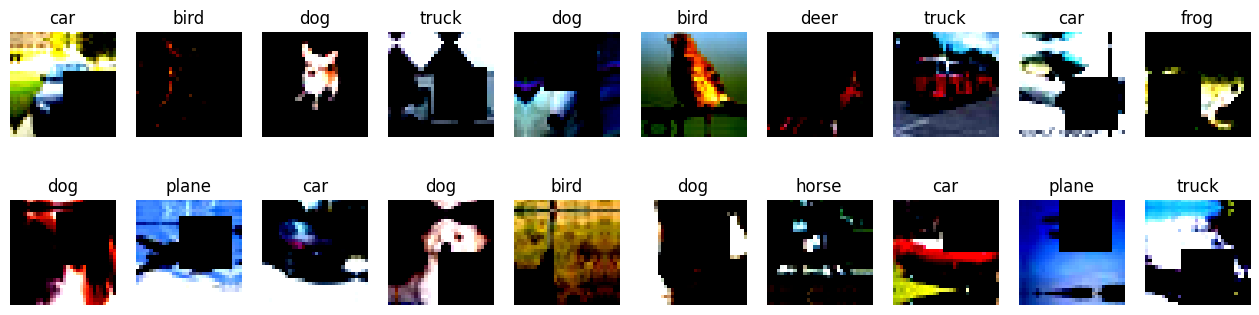

In [8]:
imageVisualizationUtility.randomly_show_images_from_tensor_array(train_dataset, cifar10Utility.get_image_classes(), fig_size=(16,4))

In [9]:
from utility import utils
model = main.get_model_instance(model_type=main.ModelType.RESNET18)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

  0%|          | 0/200 [00:00<?, ?it/s]

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 7.26E-02


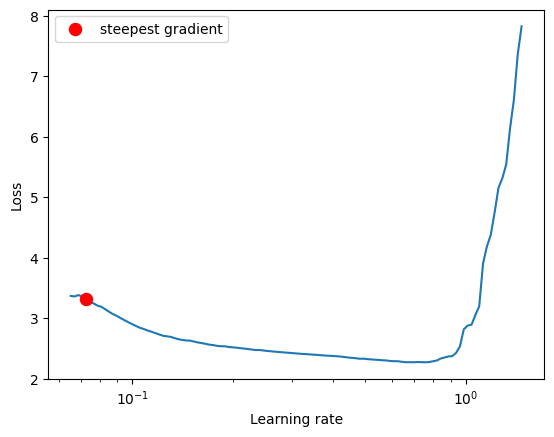

In [14]:
EPOCHS = 20
optimizer = main.get_adam_optimizer(model)
criterion = main.get_cross_entropy_loss_criteria()
optimal_learning_rate = utils.find_optimal_learning_rate(train_loader,model, optimizer, criterion)
scheduler = main.get_one_cycle_lr_scheduler(optimizer, max_lr=optimal_learning_rate,
                                            pct_start=5/EPOCHS, steps_per_epoch=len(train_loader), epochs=EPOCHS)

In [15]:

model_executor = main.NetworkModelEvaluator(train_loader, test_loader)
model_executor.execute(epochs=EPOCHS, model=model, criterion=criterion,
                       optimizer=optimizer, scheduler=scheduler)


Epoch: 0


Train: (97, 98) Loss:  2.061 | Acc:  25.156%, 12578, 50000, Total : Step time[48s522ms : 189ms]: 100%|██████████| 98/98 [00:29<00:00,  3.34it/s]
Test:  (19, 20) Loss:  1.724 | Acc:  35.580%, 3558, 10000, Total : Step time[21s92ms : 806ms]: 100%|██████████| 20/20 [00:03<00:00,  5.10it/s]


Saving..

Epoch: 1


Train: (97, 98) Loss:  1.687 | Acc:  37.958%, 18979, 50000, Total : Step time[49s460ms : 190ms]: 100%|██████████| 98/98 [00:30<00:00,  3.26it/s]
Test:  (19, 20) Loss:  1.678 | Acc:  39.720%, 3972, 10000, Total : Step time[20s739ms : 66ms]: 100%|██████████| 20/20 [00:03<00:00,  6.04it/s]


Saving..

Epoch: 2


Train: (97, 98) Loss:  1.501 | Acc:  45.200%, 22600, 50000, Total : Step time[50s181ms : 206ms]: 100%|██████████| 98/98 [00:30<00:00,  3.22it/s]
Test:  (19, 20) Loss:  1.411 | Acc:  49.250%, 4925, 10000, Total : Step time[20s175ms : 56ms]: 100%|██████████| 20/20 [00:03<00:00,  6.33it/s]


Saving..

Epoch: 3


Train: (97, 98) Loss:  1.354 | Acc:  50.712%, 25356, 50000, Total : Step time[50s322ms : 202ms]: 100%|██████████| 98/98 [00:30<00:00,  3.22it/s]
Test:  (19, 20) Loss:  1.350 | Acc:  52.590%, 5259, 10000, Total : Step time[21s136ms : 45ms]: 100%|██████████| 20/20 [00:03<00:00,  5.81it/s]


Saving..

Epoch: 4


Train: (97, 98) Loss:  1.209 | Acc:  56.418%, 28209, 50000, Total : Step time[52s498ms : 202ms]: 100%|██████████| 98/98 [00:31<00:00,  3.14it/s]
Test:  (19, 20) Loss:  1.278 | Acc:  55.120%, 5512, 10000, Total : Step time[23s548ms : 58ms]: 100%|██████████| 20/20 [00:03<00:00,  6.29it/s]


Saving..

Epoch: 5


Train: (97, 98) Loss:  1.100 | Acc:  60.852%, 30426, 50000, Total : Step time[51s983ms : 197ms]: 100%|██████████| 98/98 [00:30<00:00,  3.20it/s]
Test:  (19, 20) Loss:  1.270 | Acc:  55.250%, 5525, 10000, Total : Step time[23s673ms : 50ms]: 100%|██████████| 20/20 [00:03<00:00,  5.88it/s]


Saving..

Epoch: 6


Train: (97, 98) Loss:  1.028 | Acc:  63.450%, 31725, 50000, Total : Step time[51s440ms : 197ms]: 100%|██████████| 98/98 [00:29<00:00,  3.29it/s]
Test:  (19, 20) Loss:  0.900 | Acc:  67.580%, 6758, 10000, Total : Step time[21s822ms : 50ms]: 100%|██████████| 20/20 [00:03<00:00,  6.63it/s]


Saving..

Epoch: 7


Train: (97, 98) Loss:  0.969 | Acc:  65.370%, 32685, 50000, Total : Step time[50s990ms : 203ms]: 100%|██████████| 98/98 [00:29<00:00,  3.28it/s]
Test:  (19, 20) Loss:  0.890 | Acc:  68.930%, 6893, 10000, Total : Step time[24s721ms : 50ms]: 100%|██████████| 20/20 [00:03<00:00,  6.58it/s]


Saving..

Epoch: 8


Train: (97, 98) Loss:  0.895 | Acc:  68.100%, 34050, 50000, Total : Step time[51s343ms : 205ms]: 100%|██████████| 98/98 [00:29<00:00,  3.32it/s]
Test:  (19, 20) Loss:  0.848 | Acc:  69.750%, 6975, 10000, Total : Step time[21s450ms : 49ms]: 100%|██████████| 20/20 [00:03<00:00,  6.44it/s]


Saving..

Epoch: 9


Train: (97, 98) Loss:  0.858 | Acc:  69.454%, 34727, 50000, Total : Step time[49s829ms : 189ms]: 100%|██████████| 98/98 [00:29<00:00,  3.36it/s]
Test:  (19, 20) Loss:  0.856 | Acc:  71.280%, 7128, 10000, Total : Step time[25s559ms : 41ms]: 100%|██████████| 20/20 [00:02<00:00,  6.87it/s]


Saving..

Epoch: 10


Train: (97, 98) Loss:  0.813 | Acc:  71.332%, 35666, 50000, Total : Step time[49s956ms : 196ms]: 100%|██████████| 98/98 [00:29<00:00,  3.34it/s]
Test:  (19, 20) Loss:  0.910 | Acc:  69.490%, 6949, 10000, Total : Step time[20s599ms : 52ms]: 100%|██████████| 20/20 [00:03<00:00,  6.61it/s]



Epoch: 11


Train: (97, 98) Loss:  0.782 | Acc:  72.512%, 36256, 50000, Total : Step time[50s82ms : 188ms]: 100%|██████████| 98/98 [00:29<00:00,  3.37it/s] 
Test:  (19, 20) Loss:  0.733 | Acc:  74.750%, 7475, 10000, Total : Step time[21s350ms : 41ms]: 100%|██████████| 20/20 [00:03<00:00,  6.65it/s]


Saving..

Epoch: 12


Train: (97, 98) Loss:  0.750 | Acc:  73.548%, 36774, 50000, Total : Step time[50s659ms : 194ms]: 100%|██████████| 98/98 [00:29<00:00,  3.32it/s]
Test:  (19, 20) Loss:  0.745 | Acc:  75.050%, 7505, 10000, Total : Step time[25s221ms : 54ms]: 100%|██████████| 20/20 [00:03<00:00,  6.27it/s]


Saving..

Epoch: 13


Train: (97, 98) Loss:  0.723 | Acc:  74.534%, 37267, 50000, Total : Step time[53s429ms : 191ms]: 100%|██████████| 98/98 [00:29<00:00,  3.37it/s]
Test:  (19, 20) Loss:  0.658 | Acc:  77.620%, 7762, 10000, Total : Step time[20s850ms : 52ms]: 100%|██████████| 20/20 [00:03<00:00,  6.49it/s]


Saving..

Epoch: 14


Train: (97, 98) Loss:  0.711 | Acc:  75.110%, 37555, 50000, Total : Step time[49s158ms : 191ms]: 100%|██████████| 98/98 [00:29<00:00,  3.36it/s]
Test:  (19, 20) Loss:  0.748 | Acc:  75.090%, 7509, 10000, Total : Step time[21s34ms : 51ms]: 100%|██████████| 20/20 [00:03<00:00,  6.65it/s] 



Epoch: 15


Train: (97, 98) Loss:  0.693 | Acc:  75.698%, 37849, 50000, Total : Step time[49s243ms : 193ms]: 100%|██████████| 98/98 [00:28<00:00,  3.38it/s]
Test:  (19, 20) Loss:  0.837 | Acc:  73.280%, 7328, 10000, Total : Step time[20s845ms : 52ms]: 100%|██████████| 20/20 [00:02<00:00,  6.79it/s]



Epoch: 16


Train: (97, 98) Loss:  0.677 | Acc:  76.354%, 38177, 50000, Total : Step time[49s587ms : 192ms]: 100%|██████████| 98/98 [00:29<00:00,  3.34it/s]
Test:  (19, 20) Loss:  0.640 | Acc:  78.230%, 7823, 10000, Total : Step time[22s66ms : 60ms]: 100%|██████████| 20/20 [00:03<00:00,  6.39it/s] 


Saving..

Epoch: 17


Train: (97, 98) Loss:  0.675 | Acc:  76.326%, 38163, 50000, Total : Step time[50s55ms : 188ms]: 100%|██████████| 98/98 [00:28<00:00,  3.39it/s] 
Test:  (19, 20) Loss:  0.651 | Acc:  77.920%, 7792, 10000, Total : Step time[21s954ms : 46ms]: 100%|██████████| 20/20 [00:02<00:00,  6.86it/s]



Epoch: 18


Train: (97, 98) Loss:  0.661 | Acc:  76.790%, 38395, 50000, Total : Step time[49s993ms : 189ms]: 100%|██████████| 98/98 [00:28<00:00,  3.40it/s]
Test:  (19, 20) Loss:  0.576 | Acc:  79.980%, 7998, 10000, Total : Step time[21s181ms : 61ms]: 100%|██████████| 20/20 [00:02<00:00,  6.69it/s]


Saving..

Epoch: 19


Train: (97, 98) Loss:  0.655 | Acc:  76.894%, 38447, 50000, Total : Step time[49s706ms : 191ms]: 100%|██████████| 98/98 [00:28<00:00,  3.39it/s]
Test:  (19, 20) Loss:  0.830 | Acc:  74.300%, 7430, 10000, Total : Step time[21s769ms : 63ms]: 100%|██████████| 20/20 [00:03<00:00,  6.63it/s]

Finished! Total execution time: 24m37s


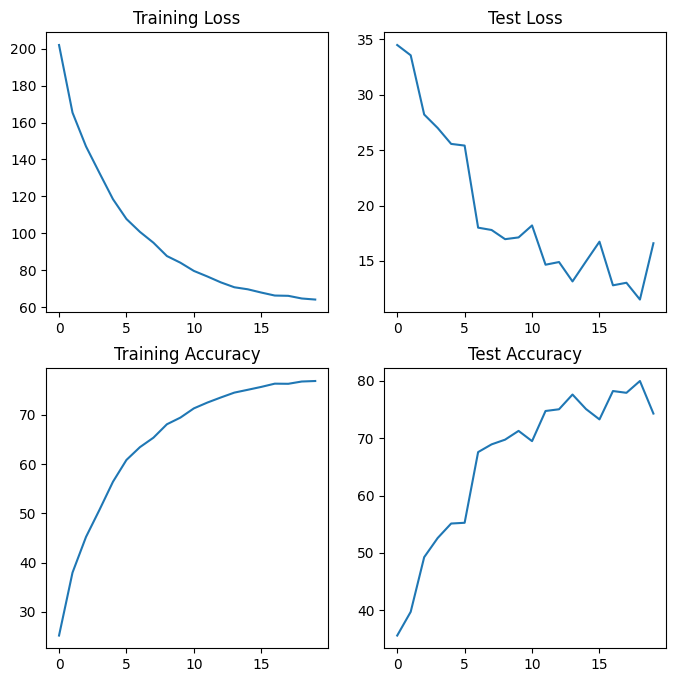

In [16]:
model_executor.show_train_and_test_accuracy_and_losses()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

----****----Wrongly predicted test images: 20


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


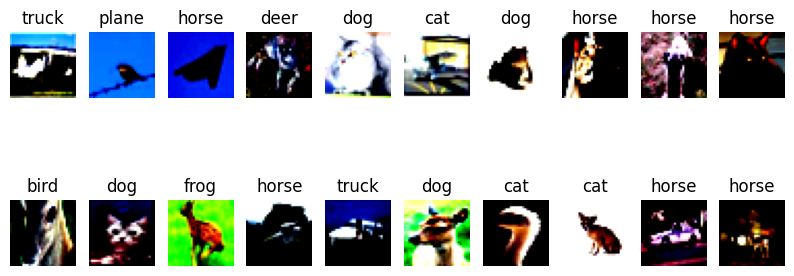

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


----****----Wrongly predicted train images: 20


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

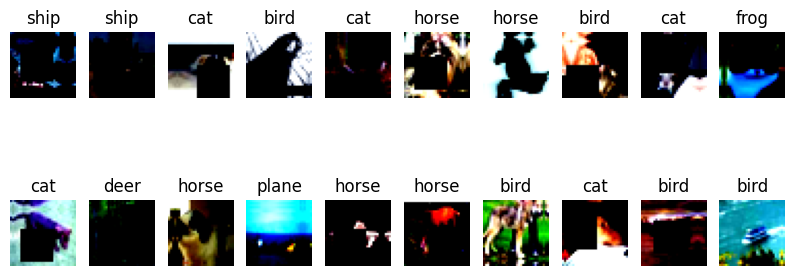

In [17]:
print(f"----****----Wrongly predicted test images: {len(model_executor.wrongly_predicted_test_images)}")
imageVisualizationUtility.show_images_from_tensor_array(list(model_executor.wrongly_predicted_test_images), cifar10Utility.get_image_classes(), shape=(2,10))

print(f"----****----Wrongly predicted train images: {len(model_executor.wrongly_predicted_trained_images)}")
imageVisualizationUtility.show_images_from_tensor_array(list(model_executor.wrongly_predicted_trained_images), cifar10Utility.get_image_classes(), shape=(2,10))

In [21]:
# Taking n-1 layer
module = model.module
target_layer = module.layer3
print(target_layer)

target_layers = module.layer3[-1]
print(target_layers)

Sequential(
  (0): BasicBlock(
    (conv1): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (shortcut): Sequential(
      (0): Conv2d(128, 256, kernel_size=(1, 1), stride=(2, 2), bias=False)
      (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
  )
  (1): BasicBlock(
    (conv1): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (

In [19]:

wrongly_predicted_test_images = list(model_executor.wrongly_predicted_test_images)

In [36]:
from pytorch_grad_cam import GradCAM
from torchvision import models, transforms

cam = GradCAM(model=model, target_layers=[target_layers])

def preprocess_to_pil_image(image_data):
    transform = transforms.ToPILImage()
    image_data = transform(image_data)
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.2470, 0.2435, 0.2616])
    ])
    return transform(image_data).unsqueeze(0)

In [37]:

transformed_pil_images = []
for selected_image, label in wrongly_predicted_test_images:
    transformed_image = preprocess_to_pil_image(selected_image)
    transformed_pil_images.append((transformed_image, label))

In [39]:
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image
import numpy as np

all_classes = cifar10Utility.get_image_classes()

targets  = ClassifierOutputTarget(len(all_classes)-1) # 0-9

final_images_for_visualization = []


for pil_image, label in transformed_pil_images:
    grayscale_cam = cam(input_tensor=pil_image, targets=[targets])
    grayscale_cam = grayscale_cam[0, :]
    final_image = pil_image.numpy() / 255
    final_image = final_image.squeeze(0).transpose((1, 2, 0))
    final_images_for_visualization.append((show_cam_on_image(final_image , grayscale_cam, use_rgb=True), label))


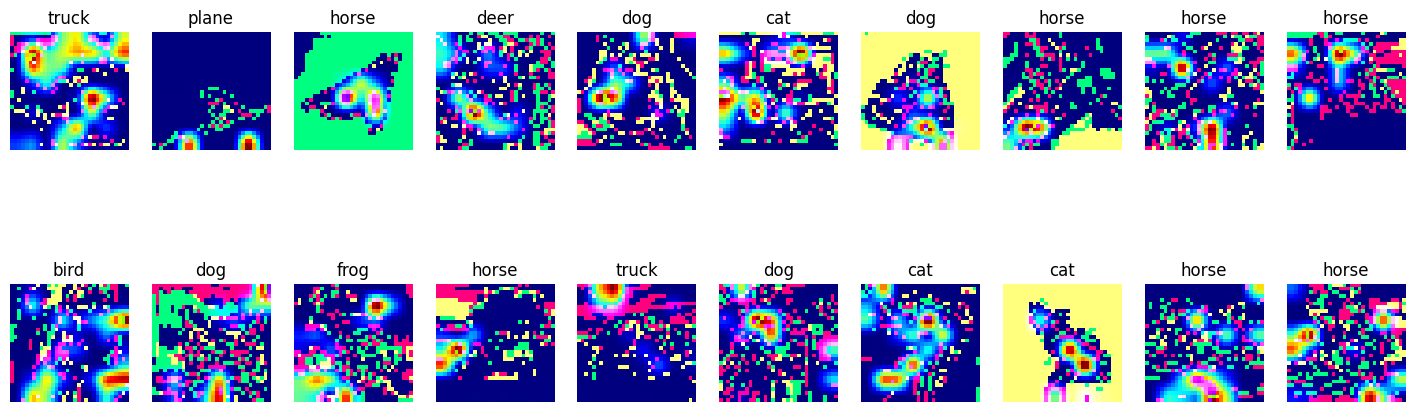

In [42]:

imageVisualizationUtility.show_processed_images(final_images_for_visualization, all_classes, rows=2, cols=10, fig_size=(18,6))
